In [20]:
import warnings
warnings.filterwarnings('ignore')

In [21]:
#load all dependencies
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [22]:
#connect to database
path = "model/db/HeartDiseaseByCounty.db"
cnx = sqlite3.connect(path)

In [23]:
#Read dataframe from SQL query
df = pd.read_sql_query("SELECT f.*, t.Level FROM \
                        Features_State_Counties f \
                        JOIN State s ON f.State_Name = s.Name \
                        JOIN Heart_Disease_Mortality_State_Counties as t ON f.County = t.County AND s.Code = t.State_Code" \
                       , cnx)
df.head()

,State_Name,County,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,...,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Largest_sector,Level
0,Alaska,Aleutians East,17,3.4,2.8,17,51,5.3,30,100,...,2376.0,321,544.0,358,1061,882,336,878,Manufacturing,1
1,Alaska,Aleutians West,15,3.0,2.5,15,44,7.6,30,100,...,4237.0,579,550.0,459,1664,1309,675,1616,Manufacturing,1
2,Alaska,Anchorage,15,3.5,3.2,15,32,8.0,18,100,...,223530.0,37266,27075.0,11867,45753,66655,67719,99544,"Educational services, and health care and soci...",1
3,Alaska,Bethel,24,5.4,4.6,30,31,2.9,31,100,...,13584.0,1661,5869.0,1798,4371,2314,1194,8539,"Educational services, and health care and soci...",2
4,Alaska,Bristol Bay,15,3.7,3.6,18,42,6.9,29,100,...,615.0,143,96.0,36,225,240,144,232,Public administration,1


In [24]:
# View statistics dataframe columns
df.describe()

,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Uninsured,Insured,Unreported_Insurance,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education,Level
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,...,3071.000000,3.071000e+03,3.072000e+03,3.071000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3.072000e+03,3072.000000
mean,17.832357,3.972363,4.149642,17.361979,32.817708,7.424577,27.353516,62.892578,17.485677,11.504232,...,8977.153696,7.683507e+04,1.892521e+04,1.330867e+04,8.599790e+03,1.891054e+04,2.031700e+04,2.208112e+04,3.480105e+04,2.469727
std,4.704372,0.696459,0.592199,3.548037,5.430713,1.270692,5.692320,23.424658,3.176629,5.190727,...,35474.297222,2.526495e+05,5.313433e+04,4.601938e+04,3.762167e+04,5.130057e+04,6.145624e+04,8.044333e+04,1.125637e+05,1.104914
min,8.000000,2.400000,2.500000,6.000000,12.000000,0.000000,10.000000,0.000000,8.000000,0.000000,...,23.000000,1.190000e+02,1.000000e+01,5.000000e+00,4.000000e+00,1.500000e+01,2.400000e+01,0.000000e+00,1.900000e+01,1.000000
25%,14.000000,3.500000,3.700000,15.000000,29.000000,6.900000,24.000000,49.000000,15.000000,7.000000,...,876.500000,7.245000e+03,2.538500e+03,1.565500e+03,9.677500e+02,2.745750e+03,2.277250e+03,1.194750e+03,3.283500e+03,2.000000
50%,17.000000,3.900000,4.200000,17.000000,33.000000,7.700000,27.000000,66.000000,18.000000,11.000000,...,2140.000000,1.743800e+04,5.767000e+03,3.724000e+03,2.464500e+03,6.334000e+03,5.325500e+03,3.162500e+03,7.950500e+03,2.000000
75%,21.000000,4.400000,4.600000,20.000000,36.000000,8.200000,31.000000,80.000000,20.000000,15.000000,...,5675.500000,4.730000e+04,1.444550e+04,9.175500e+03,5.667500e+03,1.511100e+04,1.442075e+04,1.049675e+04,2.250150e+04,4.000000
max,41.000000,6.500000,6.300000,41.000000,58.000000,10.000000,50.000000,100.000000,29.000000,34.000000,...,935213.000000,7.703359e+06,1.527541e+06,1.409155e+06,1.460718e+06,1.416482e+06,1.790808e+06,2.177481e+06,3.260029e+06,4.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x1a1c654c90>,
 'caps': [<matplotlib.lines.Line2D at 0x1a1c654b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1a1c654c50>],
 'medians': [<matplotlib.lines.Line2D at 0x1a1b602dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1a1b5e5ed0>],
 'means': []}

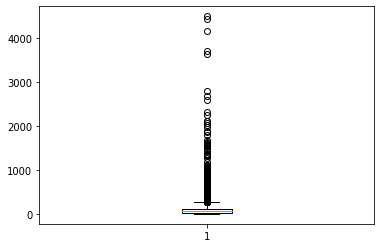

In [25]:
# This feature has so many outliers

series = df["Average_Traffic_Volume_per_Meter_of_Major_Roadways"]
plt.boxplot(series) 

In [26]:
#let drop the column
df.drop(columns=["Average_Traffic_Volume_per_Meter_of_Major_Roadways"], inplace=True)

In [27]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
College_or_associates                          3072
Bachelor_degree_or_higher                      3072
Unreported_education                           3072
Largest_sector                                 3072
Level                                          3072
Length: 68, dtype: int64

In [28]:
# Find columns that contain NULL value
col_null = list(col_count[col_count != 3072].index)
col_null

['Household_Income_AIAN',
 'Household_Income_Asian',
 'Household_Income_Black',
 'Household_Income_Hispanic',
 'Household_Income_White',
 'Percent_Severe_Housing_Cost_Burden',
 'Percent_Children_in_Poverty',
 'Teen_Birth_Rate',
 'Uninsured',
 'Insured',
 'Poverty']

In [29]:
# drop columns
df.drop(columns=["Percent_Severe_Housing_Cost_Burden","Percent_Children_in_Poverty","Teen_Birth_Rate"], inplace=True)


In [30]:
# Fill value columns
df.fillna(value=0,inplace=True)

In [31]:
col_count = df.count()
col_count

State_Name                                     3072
County                                         3072
Percent_Fair_or_Poor_Health                    3072
Average_Number_of_Physically_Unhealthy_Days    3072
Average_Number_of_Mentally_Unhealthy_Days      3072
                                               ... 
College_or_associates                          3072
Bachelor_degree_or_higher                      3072
Unreported_education                           3072
Largest_sector                                 3072
Level                                          3072
Length: 65, dtype: int64

In [32]:
# Find columns with percent
#percent_cols = [ col for col in df.columns if col.startswith( 'Percent_' ) ]
# Convert back to number
#value_cols = df[percent_cols].multiply(df["Population"]//100, axis="index")
# assign new values
#df[percent_cols] = value_cols
#df.head()

In [36]:
# Drop column list
drop_cols = ["Level","State_Name","County", "Presence_of_Water_Violation", "Insured", "Unreported_Insurance", Largest_sector"]
# Target
y = df["Level"].values
print(y)
# Create our features
X = df.drop(columns= drop_cols)
X.head()

[1 1 1 ... 2 2 3]


,Percent_Fair_or_Poor_Health,Average_Number_of_Physically_Unhealthy_Days,Average_Number_of_Mentally_Unhealthy_Days,Percent_Smokers,Percent_Adults_with_Obesity,Food_Environment_Index,Percent_Physically_Inactive,Percent_With_Access_to_Exercise_Opportunities,Percent_Excessive_Drinking,Percent_Uninsured,...,Female_Under_30,Female_30-59,Female_Over_60,Uninsured,Poverty,Less_than_high_school,High_school_only,College_or_associates,Bachelor_degree_or_higher,Unreported_education
0,17,3.4,2.8,17,51,5.3,30,100,17,28,...,281,636,224,818.0,544.0,358,1061,882,336,878
1,15,3.0,2.5,15,44,7.6,30,100,19,20,...,680,995,298,907.0,550.0,459,1664,1309,675,1616
2,15,3.5,3.2,15,32,8.0,18,100,21,13,...,59980,57528,25646,30742.0,27075.0,11867,45753,66655,67719,99544
3,24,5.4,4.6,30,31,2.9,31,100,22,20,...,4902,2830,1108,2971.0,5869.0,1798,4371,2314,1194,8539
4,15,3.7,3.6,18,42,6.9,29,100,21,17,...,149,172,88,119.0,96.0,36,225,240,144,232


In [37]:
# Create X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=78, stratify=y)

In [38]:
# Creating a StandardScaler instance.
scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)

X_test_scaled = X_scaler.transform(X_test)

# Logistic Regression

In [39]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(solver='lbfgs', random_state=78)
lr_model.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=78, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
# Run the test with model
y_pred = lr_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5467224546722455

In [41]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,285,192,18,10
Actual 2,138,360,108,63
Actual 3,19,133,140,146
Actual 4,12,52,84,391


In [42]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.63      0.56      0.59       505
           2       0.49      0.54      0.51       669
           3       0.40      0.32      0.36       438
           4       0.64      0.73      0.68       539

    accuracy                           0.55      2151
   macro avg       0.54      0.54      0.54      2151
weighted avg       0.54      0.55      0.54      2151



# KNeighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier
kn_model = KNeighborsClassifier(n_neighbors=25)

In [44]:
kn_model = kn_model.fit(X_train_scaled, y_train)

In [45]:
# Run the test with model
y_pred = kn_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5397489539748954

In [46]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,269,205,16,15
Actual 2,135,355,110,69
Actual 3,26,119,145,148
Actual 4,9,41,97,392


In [47]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.53      0.57       505
           2       0.49      0.53      0.51       669
           3       0.39      0.33      0.36       438
           4       0.63      0.73      0.67       539

    accuracy                           0.54      2151
   macro avg       0.53      0.53      0.53      2151
weighted avg       0.53      0.54      0.53      2151



# Decision Tree

In [48]:
from sklearn.tree import DecisionTreeClassifier
# Create a model Decision Tree
dt_model =  DecisionTreeClassifier(random_state=78) 

In [49]:
dt_model = dt_model.fit(X_train_scaled, y_train)

In [50]:
# Run the test with model
y_pred = dt_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.45420734542073454

In [51]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,257,170,54,24
Actual 2,171,274,133,91
Actual 3,37,131,129,141
Actual 4,33,75,114,317


In [52]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.52      0.51      0.51       505
           2       0.42      0.41      0.42       669
           3       0.30      0.29      0.30       438
           4       0.55      0.59      0.57       539

    accuracy                           0.45      2151
   macro avg       0.45      0.45      0.45      2151
weighted avg       0.45      0.45      0.45      2151



In [53]:
importances = dt_model.feature_importances_
sorted(zip(importances, X.columns), reverse=True)

[(0.12412179254134194, 'Percent_Smokers'),
 (0.061679763136464054, 'Median_Household_Income'),
 (0.04717467843402751, 'Violent_Crime_Rate'),
 (0.04715725525308743, 'Population_Hispanic'),
 (0.039765303886315356, 'Percent_Excessive_Drinking'),
 (0.0336884712832896, 'Percent_Vaccinated'),
 (0.032705454259858595, 'Percent_Physically_Inactive'),
 (0.02995641182496583, 'Percent_Some_College'),
 (0.02894308239162295, 'Polution_Average_Daily_PM2.5'),
 (0.028139219523274608, 'Household_Income_Asian'),
 (0.027683519742880205, 'Social_Association_Rate'),
 (0.025014724574944525, 'Percent_Insufficient_Sleep'),
 (0.024431603839913316, 'Population_Asian'),
 (0.022997694344519367, 'Household_Income_White'),
 (0.022812155402444446, 'Percent_With_Access_to_Exercise_Opportunities'),
 (0.022113097121013916, 'Percent_Drive_Alone_to_Work'),
 (0.02193183091853744, 'Dentist_Rate'),
 (0.020256456274595117, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.01900238832634751, 'Percent_Unemployed'),
 (0.01891641

# Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier.
rf_model = RandomForestClassifier(n_estimators=256, random_state=78, max_depth= 256) 

In [55]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [56]:
# Run the test with model
y_pred = rf_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5662482566248257

In [57]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,275,209,10,11
Actual 2,123,412,82,52
Actual 3,15,145,135,143
Actual 4,8,56,79,396


In [58]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.54      0.59       505
           2       0.50      0.62      0.55       669
           3       0.44      0.31      0.36       438
           4       0.66      0.73      0.69       539

    accuracy                           0.57      2151
   macro avg       0.56      0.55      0.55      2151
weighted avg       0.56      0.57      0.56      2151



In [59]:
importances = rf_model.feature_importances_
sorted(zip(importances, X.columns), reverse=True)

[(0.04515116202371457, 'Median_Household_Income'),
 (0.0420807769560677, 'Percent_Smokers'),
 (0.036646241669773684, 'Percent_Physically_Inactive'),
 (0.03315105552934303, 'Household_Income_White'),
 (0.03143717424931157, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.030789786247172744, 'Percent_Fair_or_Poor_Health'),
 (0.030626210839101706, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.028446091824567074, 'Polution_Average_Daily_PM2.5'),
 (0.023856134387398916, 'Population_Hispanic'),
 (0.0235543885556313, 'Preventable_Hospitalization_Rate'),
 (0.022313436887331145, 'Percent_Some_College'),
 (0.019955081983232106, 'Percent_Insufficient_Sleep'),
 (0.019396063670648212, 'Percent_Excessive_Drinking'),
 (0.01923548359682229, 'Population_Asian'),
 (0.01920210127532191, 'Percent_With_Access_to_Exercise_Opportunities'),
 (0.018111976235808656, 'Percent_Drive_Alone_to_Work'),
 (0.018001786461450797, 'Social_Association_Rate'),
 (0.017673822793324703, 'Percent_Unemployed'),
 (0.01752

# Extra Trees

In [60]:
from sklearn.ensemble import ExtraTreesClassifier
# Create a extra Trees classifier.
et_model = ExtraTreesClassifier(n_estimators=256, random_state=78) 

In [61]:
et_model = et_model.fit(X_train_scaled, y_train)

In [62]:
# Run the test with model
y_pred = et_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5620641562064156

In [63]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,273,210,7,15
Actual 2,122,406,77,64
Actual 3,16,142,121,159
Actual 4,6,55,69,409


In [64]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.65      0.54      0.59       505
           2       0.50      0.61      0.55       669
           3       0.44      0.28      0.34       438
           4       0.63      0.76      0.69       539

    accuracy                           0.56      2151
   macro avg       0.56      0.55      0.54      2151
weighted avg       0.56      0.56      0.55      2151



In [65]:
importances = et_model.feature_importances_
sorted(zip(importances, X.columns), reverse=True)

[(0.036580485151461964, 'Percent_Physically_Inactive'),
 (0.036576818246203825, 'Average_Number_of_Mentally_Unhealthy_Days'),
 (0.0356780666461975, 'Average_Number_of_Physically_Unhealthy_Days'),
 (0.032452225600916575, 'Median_Household_Income'),
 (0.03217726003758859, 'Percent_Smokers'),
 (0.03138233323413628, 'Percent_Fair_or_Poor_Health'),
 (0.024751089504324475, 'Polution_Average_Daily_PM2.5'),
 (0.02392583863580734, 'Percent_Some_College'),
 (0.023398710046086863, 'Percent_Excessive_Drinking'),
 (0.022789301588367054, 'Percent_Insufficient_Sleep'),
 (0.022298921210539436, 'Household_Income_White'),
 (0.022296537858836615, 'Percent_Adults_with_Diabetes'),
 (0.02045381662483038, 'Preventable_Hospitalization_Rate'),
 (0.0193209879972787, 'Percent_With_Access_to_Exercise_Opportunities'),
 (0.018795873989416588, 'Percent_Adults_with_Obesity'),
 (0.01743166954815973, 'Food_Environment_Index'),
 (0.017183448375661423, 'Percent_Unemployed'),
 (0.01715738731291692, 'Percent_Drive_Alone_to

# Ada Boost

In [66]:
from sklearn.ensemble import AdaBoostClassifier

ab_model = AdaBoostClassifier(n_estimators=256)

In [67]:
ab_model = ab_model.fit(X_train_scaled, y_train)

In [68]:
# Run the test with model
y_pred = ab_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5346350534635054

In [69]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,317,164,15,9
Actual 2,174,318,108,69
Actual 3,20,124,127,167
Actual 4,11,58,82,388


In [70]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.61      0.63      0.62       505
           2       0.48      0.48      0.48       669
           3       0.38      0.29      0.33       438
           4       0.61      0.72      0.66       539

    accuracy                           0.53      2151
   macro avg       0.52      0.53      0.52      2151
weighted avg       0.52      0.53      0.53      2151



# Gradient Boosting

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=100, random_state=78)

In [72]:
gb_model = gb_model.fit(X_train_scaled, y_train)

In [73]:
# Run the test with model
y_pred = gb_model.predict(X_test_scaled)
# Find accuracy
accuracy_score(y_test, y_pred)

0.5564853556485355

In [74]:
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 1", "Actual 2", "Actual 3", "Actual 4"], columns=["Predicted 1", "Predicted 2", "Predicted 3", "Predicted 4"])

cm_df

,Predicted 1,Predicted 2,Predicted 3,Predicted 4
Actual 1,295,177,22,11
Actual 2,149,365,107,48
Actual 3,19,132,155,132
Actual 4,13,50,94,382


In [75]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           1       0.62      0.58      0.60       505
           2       0.50      0.55      0.52       669
           3       0.41      0.35      0.38       438
           4       0.67      0.71      0.69       539

    accuracy                           0.56      2151
   macro avg       0.55      0.55      0.55      2151
weighted avg       0.55      0.56      0.55      2151



# Deep Learning

In [76]:
import tensorflow as tf
# Define the model - deep neural net
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = number_input_features*32
hidden_nodes_layer2 = number_input_features*16
hidden_nodes_layer3 = number_input_features*8
hidden_nodes_layer4 = number_input_features*4


nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# fouth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1856)              109504    
_________________________________________________________________
dense_1 (Dense)              (None, 928)               1723296   
_________________________________________________________________
dense_2 (Dense)              (None, 464)               431056    
_________________________________________________________________
dense_3 (Dense)              (None, 232)               107880    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 233       
Total params: 2,371,969
Trainable params: 2,371,969
Non-trainable params: 0
_________________________________________________________________


In [77]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100)

Train on 921 samples
Epoch 1/100
921/921 [==============================] - 4s 4ms/sample - loss: -21.4013 - accuracy: 0.2302
Epoch 2/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 3/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 4/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 5/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 6/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 7/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 8/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 9/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 10/100
921/921 [============

921/921 [==============================] - 3s 3ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 78/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 79/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 80/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 81/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 82/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 83/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 84/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 85/100
921/921 [==============================] - 2s 2ms/sample - loss: -22.5254 - accuracy: 0.2356
Epoch 86/100
921/921 [==============================] - 2s 

In [79]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

2151/1 - 1s - loss: -2.3318e+01 - accuracy: 0.2348
Loss: -22.54007452535164, Accuracy: 0.23477452993392944


# PCA

In [85]:
#using Principle Component Analysis find few PCA and the feature contribution to each one of them

In [86]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

In [87]:
#Initialize PCA model
pca = PCA(n_components=5)

In [88]:
hd_pca = pca.fit_transform(X_train_scaled)
#let's check the shape of hd_pca array
print ("shape of X_pca", hd_pca.shape)

shape of X_pca (921, 5)


In [89]:
#once pca is trained lets get the variance ratio and its details
ex_variance=np.var(hd_pca,axis=0)
ex_variance_ratio = ex_variance/np.sum(ex_variance)
print (ex_variance_ratio )

[0.54413712 0.22483589 0.0924242  0.09007151 0.04853128]


In [90]:
#Based on variance ration the variance ratio for each one of the PCA is
#PCA1 = 0.544, PCA2 = 0.225, PCA3 = 0.0924, PCA4 = 0.0901, PCA5 = 0.0485
# Knowing PCA is good but it would be clear if we can see which features contribute to each one of the PCA

RuntimeError: No mappable was found to use for colorbar creation. First define a mappable such as an image (with imshow) or a contour set (with contourf).

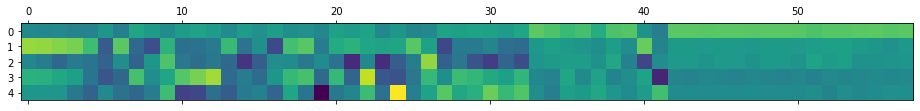

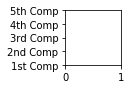

In [95]:
plt.matshow(pca.components_,cmap='viridis')
plt.figure(figsize=(1,1))
plt.yticks([0,1,2,3,4],['1st Comp','2nd Comp','3rd Comp', '4th Comp', '5th Comp'],fontsize=10)
plt.colorbar()
plt.xticks(range(len(X.columns)),X.columns,rotation=65,ha='left')
plt.tight_layout()
plt.savefig('images/heartdisease_pca_matrix.png')
plt.show()

In [93]:
plt.savefig('images/heartdisease_pca_matrix.png')

<Figure size 432x288 with 0 Axes>